# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./test/train.p"
validation_file = "./test/valid.p"
testing_file = "./test/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))
print("Loading imgs completed.")

Loading imgs completed.


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [51]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_test))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("class are: {}".format(set(y_test)))

Number of training examples = 258000
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43
class are: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42}


# Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

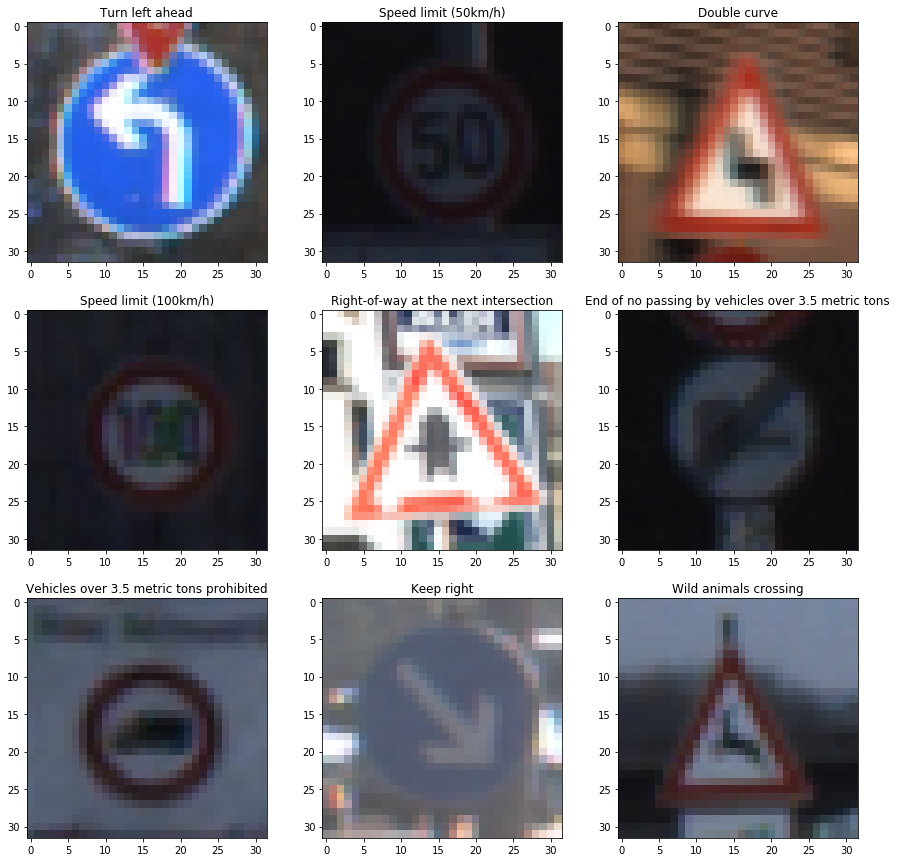

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import numpy as np
from PIL import Image, ImageEnhance
# Visualizations will be shown in the notebook.
%matplotlib inline

# load name of id
with open("./signnames.csv", "r") as f:
    signnames = f.read()
id_to_name = {int(line.split(",")[0]):line.split(",")[1] for line in signnames.split("\n")[1:] if len(line) > 0}
# print (id_to_name)

graph_size = 3
random_index_list = [random.randint(0, X_train.shape[0]) for _ in range(graph_size * graph_size)]
fig = plt.figure(figsize=(15, 15))
for i, index in enumerate(random_index_list):
    a=fig.add_subplot(graph_size, graph_size, i+1)
    #im = Image.fromarray(np.rollaxis(X_train[index] * 255, 0,3))
    imgplot = plt.imshow(X_train[index])
    # Plot some images
    a.set_title('%s' % id_to_name[y_train[index]])

plt.show()

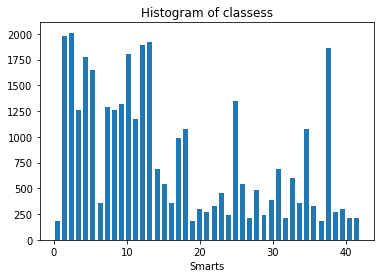

In [4]:
# histogram of label frequency
fig, ax = plt.subplots()
# the histogram of the data
ax.set_xlabel('Smarts')
ax.set_title(r'Histogram of classess')
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

#### To gray scale

In [5]:
# converting to grayscale
import cv2
def to_gray_scale(img_data):
    return cv2.cvtColor(img_data.astype(np.float32), cv2.COLOR_RGB2GRAY)

X_train_gray = np.zeros([X_train.shape[0], X_train.shape[1], X_train.shape[2]])
X_test_gray = np.zeros([X_test.shape[0], X_test.shape[1], X_test.shape[2]])
for feature in range(len(X_train)):
    #print(X_train[feature].dtype)
    X_train_gray[feature] = to_gray_scale(X_train[feature])
for feature in range(len(X_test)):
    #print(X_train[feature].dtype)
    X_test_gray[feature] = to_gray_scale(X_test[feature])    
X_train = X_train_gray
X_test = X_test_gray

#### grayscale testing

Here is classify (4: Speed limit (70km/h)) 


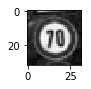

In [6]:
index = random.randint(1, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image,cmap='gray')
print("Here is classify ({}: {}) ".format(y_train[index],id_to_name[y_train[index]]))

#### To transform image

In [7]:
def transform_image(img,ang_range,shear_range,trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    # updated to reflect gray pipeline
    rows,cols = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    return img

#### transformation testing

raw:


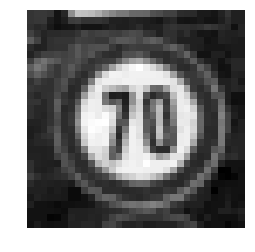

Generated images:


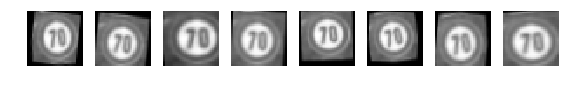

In [8]:
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg

print("raw:")
plt.imshow(image, cmap="gray");
plt.axis('off');
plt.show()

gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02)
plt.figure(figsize=(12,12))

print("Generated images:")
for i in range(8):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    img = transform_image(image,30,4,4)

    plt.subplot(10,10,i+1)
    plt.imshow(img, cmap="gray")
    plt.axis('off')

plt.show()

####  To generate fake data

Generating additional features.
X_train num: 34799
Here is classify (0: Speed limit (20km/h)) 
Number of features:  180
features_to_be_generated:  7320


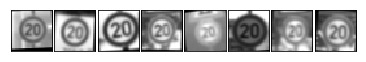

-----------------------------------------------------

Here is classify (1: Speed limit (30km/h)) 
Number of features:  1980
features_to_be_generated:  5520


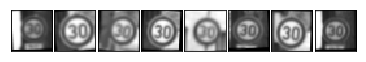

-----------------------------------------------------

Here is classify (2: Speed limit (50km/h)) 
Number of features:  2010
features_to_be_generated:  5490


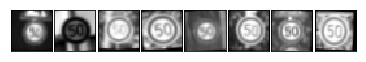

-----------------------------------------------------

Here is classify (3: Speed limit (60km/h)) 
Number of features:  1260
features_to_be_generated:  6240


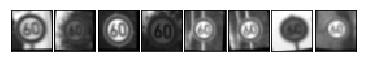

-----------------------------------------------------

Here is classify (4: Speed limit (70km/h)) 
Number of features:  1770
features_to_be_generated:  5730


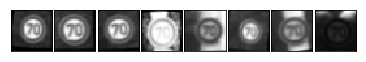

-----------------------------------------------------

Here is classify (5: Speed limit (80km/h)) 
Number of features:  1650
features_to_be_generated:  5850


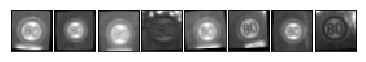

-----------------------------------------------------

Here is classify (6: End of speed limit (80km/h)) 
Number of features:  360
features_to_be_generated:  7140


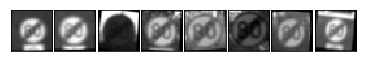

-----------------------------------------------------

Here is classify (7: Speed limit (100km/h)) 
Number of features:  1290
features_to_be_generated:  6210


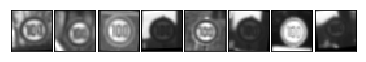

-----------------------------------------------------

Here is classify (8: Speed limit (120km/h)) 
Number of features:  1260
features_to_be_generated:  6240


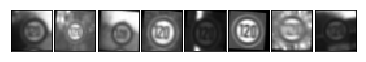

-----------------------------------------------------

Here is classify (9: No passing) 
Number of features:  1320
features_to_be_generated:  6180


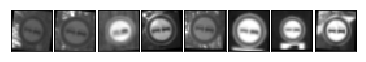

-----------------------------------------------------

Here is classify (10: No passing for vehicles over 3.5 metric tons) 
Number of features:  1800
features_to_be_generated:  5700


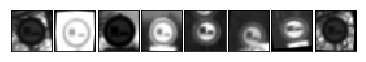

-----------------------------------------------------

Here is classify (11: Right-of-way at the next intersection) 
Number of features:  1170
features_to_be_generated:  6330


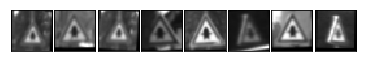

-----------------------------------------------------

Here is classify (12: Priority road) 
Number of features:  1890
features_to_be_generated:  5610


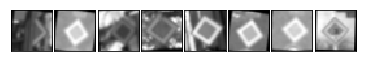

-----------------------------------------------------

Here is classify (13: Yield) 
Number of features:  1920
features_to_be_generated:  5580


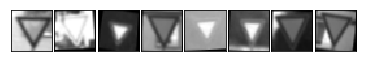

-----------------------------------------------------

Here is classify (14: Stop) 
Number of features:  690
features_to_be_generated:  6810


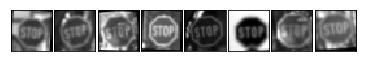

-----------------------------------------------------

Here is classify (15: No vehicles) 
Number of features:  540
features_to_be_generated:  6960


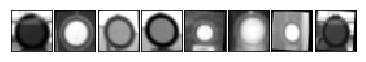

-----------------------------------------------------

Here is classify (16: Vehicles over 3.5 metric tons prohibited) 
Number of features:  360
features_to_be_generated:  7140


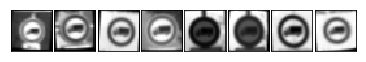

-----------------------------------------------------

Here is classify (17: No entry) 
Number of features:  990
features_to_be_generated:  6510


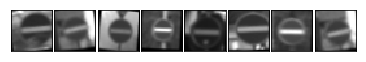

-----------------------------------------------------

Here is classify (18: General caution) 
Number of features:  1080
features_to_be_generated:  6420


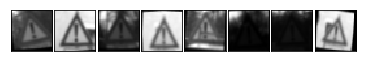

-----------------------------------------------------

Here is classify (19: Dangerous curve to the left) 
Number of features:  180
features_to_be_generated:  7320


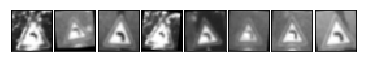

-----------------------------------------------------

Here is classify (20: Dangerous curve to the right) 
Number of features:  300
features_to_be_generated:  7200


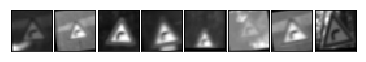

-----------------------------------------------------

Here is classify (21: Double curve) 
Number of features:  270
features_to_be_generated:  7230


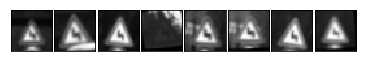

-----------------------------------------------------

Here is classify (22: Bumpy road) 
Number of features:  330
features_to_be_generated:  7170


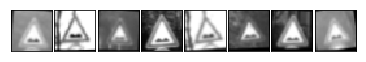

-----------------------------------------------------

Here is classify (23: Slippery road) 
Number of features:  450
features_to_be_generated:  7050


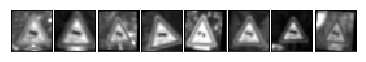

-----------------------------------------------------

Here is classify (24: Road narrows on the right) 
Number of features:  240
features_to_be_generated:  7260


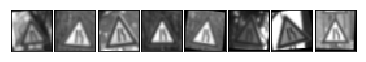

-----------------------------------------------------

Here is classify (25: Road work) 
Number of features:  1350
features_to_be_generated:  6150


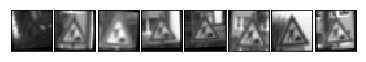

-----------------------------------------------------

Here is classify (26: Traffic signals) 
Number of features:  540
features_to_be_generated:  6960


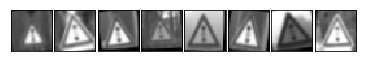

-----------------------------------------------------

Here is classify (27: Pedestrians) 
Number of features:  210
features_to_be_generated:  7290


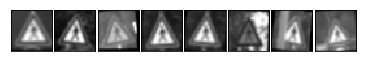

-----------------------------------------------------

Here is classify (28: Children crossing) 
Number of features:  480
features_to_be_generated:  7020


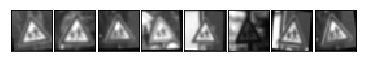

-----------------------------------------------------

Here is classify (29: Bicycles crossing) 
Number of features:  240
features_to_be_generated:  7260


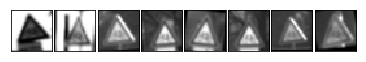

-----------------------------------------------------

Here is classify (30: Beware of ice/snow) 
Number of features:  390
features_to_be_generated:  7110


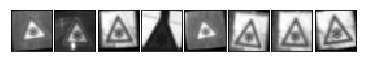

-----------------------------------------------------

Here is classify (31: Wild animals crossing) 
Number of features:  690
features_to_be_generated:  6810


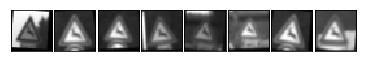

-----------------------------------------------------

Here is classify (32: End of all speed and passing limits) 
Number of features:  210
features_to_be_generated:  7290


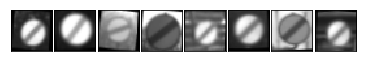

-----------------------------------------------------

Here is classify (33: Turn right ahead) 
Number of features:  599
features_to_be_generated:  6901


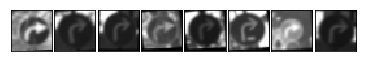

-----------------------------------------------------

Here is classify (34: Turn left ahead) 
Number of features:  360
features_to_be_generated:  7140


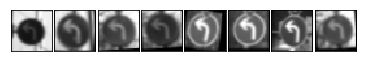

-----------------------------------------------------

Here is classify (35: Ahead only) 
Number of features:  1080
features_to_be_generated:  6420


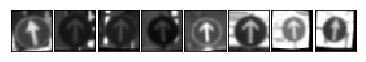

-----------------------------------------------------

Here is classify (36: Go straight or right) 
Number of features:  330
features_to_be_generated:  7170


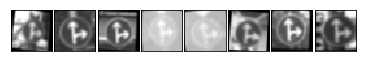

-----------------------------------------------------

Here is classify (37: Go straight or left) 
Number of features:  180
features_to_be_generated:  7320


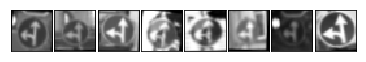

-----------------------------------------------------

Here is classify (38: Keep right) 
Number of features:  1860
features_to_be_generated:  5640


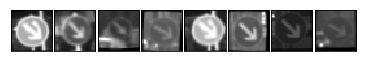

-----------------------------------------------------

Here is classify (39: Keep left) 
Number of features:  270
features_to_be_generated:  7230


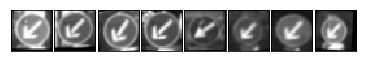

-----------------------------------------------------

Here is classify (40: Roundabout mandatory) 
Number of features:  300
features_to_be_generated:  7200


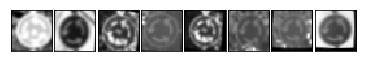

-----------------------------------------------------

Here is classify (41: End of no passing) 
Number of features:  210
features_to_be_generated:  7290


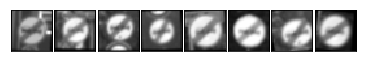

-----------------------------------------------------

Here is classify (42: End of no passing by vehicles over 3.5 metric tons) 
Number of features:  210
features_to_be_generated:  7290


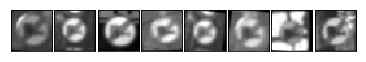

-----------------------------------------------------

generate completed...


In [9]:
"""

This loop looks at each label in the data set and generates images up to the feature_count_goal.

"""

goal_number_of_features = 7500   # features per label
ang_range = 15   # Range of angles for rotation
shear_range = 2   # Range of values to apply affine transform to
trans_range = 2   # Range of values to apply translations over.

print("Generating additional features.")

from pandas.io.parsers import read_csv
signnames = read_csv("signnames.csv").values[:, 1]
unique_labels = np.unique(y_train)

print("X_train num: {}".format(len(X_train)))
    
for label_id in range(len(unique_labels)):
    unique_labels = np.unique(y_train)
    #Print update to feature tracking.
    print("Here is classify ({}: {}) ".format(label_id,signnames[label_id]))
    
    #Print feature currently being generate    
    y_labels = np.where(y_train == label_id)
    
    number_of_features = len(X_train[y_labels])
    print("Number of features: ", number_of_features)
    feature_difference = goal_number_of_features - number_of_features
    
    # Set features to generate to 0 if less than 0
    if feature_difference > 0:
        features_to_be_generated = feature_difference
    else:
        features_to_be_generated = 0
    print("features_to_be_generated: ", features_to_be_generated)
    
    # Graceful handling if no features to be generated
    if features_to_be_generated > 0:
        new_features = []
        new_labels = []
        
        # Start actually generated features while there are features to be generated
        while i <= features_to_be_generated:
            for feature in X_train[y_labels]:
                
                # Graceful stopping if > 1 passes through loop
                if features_to_be_generated == 0: 
                    break
                
                else:
                    # generate image
                    new_image = transform_image(feature,ang_range,shear_range,trans_range)
                    
                    new_features.append(new_image)
                    new_labels.append(label_id)
                    
                    features_to_be_generated = features_to_be_generated - 1
        i = i + 1

        # Append image to data
        # IMPORTANT axis=0 must be set or strange issues even though supposedly default is axis=0
        X_train = np.append(X_train, new_features, axis=0)
        y_train = np.append(y_train, new_labels, axis=0)
        
    else:
        print("Passing, no images to generate")
        
    # update y labels
    y_labels = np.where(y_train == label_id)
    x = np.array(y_labels)
    x_min = x[0, -200]
    x_max = x[0, -1]
    random_index = random.sample(range(x_min, x_max), 10)
    
    # graphing function concepts from http://navoshta.com/traffic-signs-classification/
    fig = plt.figure(figsize = (6, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    
    for i in range(8):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(X_train[random_index[i]], cmap="gray")
    plt.show()
    print("-----------------------------------------------------\n")
print("generate completed...")

#### To normalize

In [10]:
#Normalize the train and test datasets to (0,1)
X_train = (X_train / 255.).astype(np.float32)
X_test = (X_test / 255.).astype(np.float32)
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
print("shuffle data...")

shuffle data...


In [11]:
# split into 80% for train and 20% for validation

seed = 54645
from sklearn.cross_validation import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.20, random_state=seed, stratify=y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Model Architecture

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [13]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
# setting params of structure
EPOCHS = 150
BATCH_SIZE = 128
LEARNING_RATE = 0.0001

#### To create TF architecture

In [14]:
def LeNet(x, keep_prob):
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # gray scale fix
    image = tf.reshape(x, [-1,32,32,1])

    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    convolutional_1_weights = tf.Variable(tf.truncated_normal(shape=(5,5,1,6), mean = mu, stddev = sigma))
    convolutional_1_bias = tf.Variable(tf.zeros(6)) # set to 6 as output is 6
    convolutional_1 = tf.nn.conv2d(image, convolutional_1_weights, strides=[1,1,1,1], padding='VALID') + convolutional_1_bias
    
    # Activation.
    convolutional_1 = tf.nn.relu(convolutional_1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    # Stride of 2 reduces output by 2
    convolutional_1 = tf.nn.max_pool(convolutional_1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    ## END Layer 1
    
    
    # Layer 2: Convolutional. Output = 10x10x16.
    convolutional_2_weights = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean = mu, stddev = sigma))
    convolutional_2_bias = tf.Variable(tf.zeros(16))
    # pass the first layer
    convolutional_2 = tf.nn.conv2d(convolutional_1, convolutional_2_weights, strides=[1,1,1,1], padding='VALID' ) + convolutional_2_bias
    
    # Activation.
    convolutional_2 = tf.nn.relu(convolutional_2)
    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    convolutional_2 = tf.nn.max_pool(convolutional_2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    # Flatten. Input = 5x5x16. Output = 400.
    fully_connected_0 = flatten(convolutional_2)
    ### End Layer 2
    
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fully_connected_1_weights = tf.Variable(tf.truncated_normal(shape=(400,120), mean=mu, stddev=sigma))
    fully_connected_1_bias = tf.Variable(tf.zeros(120))
    fully_connected_1 = tf.matmul(fully_connected_0, fully_connected_1_weights) + fully_connected_1_bias
    
    # Activation.
    fully_connected_1 = tf.nn.relu(fully_connected_1)
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    # shape = (input, output)
    fully_connected_2_weights = tf.Variable(tf.truncated_normal(shape=(120,84), mean=mu, stddev=sigma))
    fully_connected_2_bias = tf.Variable(tf.zeros(84))
    fully_connected_2 = tf.matmul(fully_connected_1, fully_connected_2_weights) + fully_connected_2_bias
    
    # Activation.
    fully_connected_2 = tf.nn.relu(fully_connected_2)
    
    # drop out
    drop_out = tf.nn.dropout(fully_connected_2, keep_prob)
    
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fully_connected_3_weights = tf.Variable(tf.truncated_normal(shape=(84,43), mean=mu, stddev=sigma))
    fully_connected_3_bias = tf.Variable(tf.zeros(43))
    logits = tf.matmul(drop_out, fully_connected_3_weights) + fully_connected_3_bias
        
    return logits
print("LeNet completed")

LeNet completed


In [15]:
# mode setup

x = tf.placeholder(tf.float32, (None, 32, 32))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)

# added this to fix bug CUDA_ERROR_ILLEGAL_ADDRESS / kernal crash
with tf.device('/gpu:0'):
    one_hot_y = tf.one_hot(y, 43)

logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
training_operation = optimizer.minimize(loss_operation)
print("setup completed...")

setup completed...


In [16]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [17]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: .5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...
EPOCH 1 ...
Validation Accuracy = 0.616
EPOCH 2 ...
Validation Accuracy = 0.741
EPOCH 3 ...
Validation Accuracy = 0.809
EPOCH 4 ...
Validation Accuracy = 0.848
EPOCH 5 ...
Validation Accuracy = 0.871
EPOCH 6 ...
Validation Accuracy = 0.890
EPOCH 7 ...
Validation Accuracy = 0.906
EPOCH 8 ...
Validation Accuracy = 0.919
EPOCH 9 ...
Validation Accuracy = 0.924
EPOCH 10 ...
Validation Accuracy = 0.934
EPOCH 11 ...
Validation Accuracy = 0.942
EPOCH 12 ...
Validation Accuracy = 0.946
EPOCH 13 ...
Validation Accuracy = 0.951
EPOCH 14 ...
Validation Accuracy = 0.956
EPOCH 15 ...
Validation Accuracy = 0.956
EPOCH 16 ...
Validation Accuracy = 0.961
EPOCH 17 ...
Validation Accuracy = 0.964
EPOCH 18 ...
Validation Accuracy = 0.965
EPOCH 19 ...
Validation Accuracy = 0.969
EPOCH 20 ...
Validation Accuracy = 0.970
EPOCH 21 ...
Validation Accuracy = 0.971
EPOCH 22 ...
Validation Accuracy = 0.972
EPOCH 23 ...
Validation Accuracy = 0.974
EPOCH 24 ...
Validation Accuracy = 0.973
EPOCH 25 ...


#### To validate data

In [26]:
#Test data

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}\n".format(test_accuracy))
    

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.939



---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [43]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from scipy.misc import imresize
new_label_sign_ids = read_csv("new_signnames.csv").values[:, 0]
new_label_sign_names = read_csv("new_signnames.csv").values[:, 1]
for index in range(len(new_label_sign_ids)):
    print("classfy ({}: {})".format(new_label_sign_ids[index],new_label_sign_names[index]))

imgs = ['1.png', '2.png', '3.png', '4.png', '5.png']
new_input = []

for imgname in imgs:
    image = mpimg.imread('verified_pictures/' + imgname)
    image = imresize(image, (32,32))
    new_input.append(image)

classfy (5: Speed limit (80km/h))
classfy (14: Stop)
classfy (17: No entry)
classfy (18: General caution)
classfy (33: Turn right ahead)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


### Predict the Sign Type for Each Image

[5, 14, 17, 18, 33]


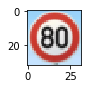

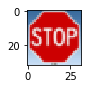

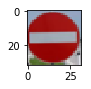

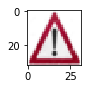

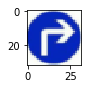

In [44]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
# Combine images into pickle data format following help from forums

imagesTogether = []
new_labels = []

for image in new_input:
    image = cv2.resize(image, (32, 32))
    # print(image.shape)
    
    imagesTogether.append(image) 
    #print(len(imagesTogether))
    
    imagesTogetherNP=np.asarray(imagesTogether)
    #print(imagesTogetherNP.shape)
    
for i in new_label_sign_ids:
    
    new_labels.append(i)
    #print(len(new_labels))
    
    new_labelsNP=np.asarray(new_labels)
    # print(new_labelsNP.shape)

print(new_labels)

for image in imagesTogetherNP:
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    plt.show()

In [45]:
X_input_gray = np.zeros([imagesTogetherNP.shape[0], imagesTogetherNP.shape[1], imagesTogetherNP.shape[2]])

for feature in range(len(imagesTogetherNP)):
    #print(X_train[feature].dtype)
    X_input_gray[feature] = to_gray_scale(imagesTogetherNP[feature])
    
imagesTogetherNP = X_input_gray

### Analyze Performance

In [47]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(imagesTogetherNP, new_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.600


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [48]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
new_input_32 = np.float32(imagesTogetherNP)

#print(X_test.dtype)
#print(imagesTogetherNP.dtype)
#print(new_input_32.dtype)

predictSoftmax = tf.nn.softmax(logits)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print("Model restored")
    
    softmaxProb  = sess.run(predictSoftmax, feed_dict={x: new_input_32, keep_prob: 1.0})
         
    top5 = sess.run(tf.nn.top_k(tf.constant(softmaxProb), k=5, sorted=True))
    
    # calculate certainty of prediction vs next best one
    difference = softmaxProb[0] - softmaxProb[1]
    
    print(difference)
    print(top5)

INFO:tensorflow:Restoring parameters from ./lenet
Model restored
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]
TopKV2(values=array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.]], dtype=float32), indices=array([[ 2,  0,  1,  3,  4],
       [13,  0,  1,  2,  3],
       [17,  0,  1,  2,  3],
       [18,  0,  1,  2,  3],
       [33,  0,  1,  2,  3]], dtype=int32))


Actual class:  Speed limit (80km/h)


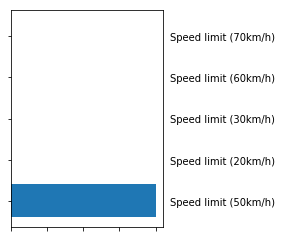

----------------------------------------------------------

Actual class:  Stop


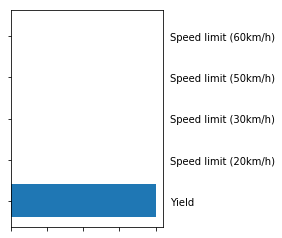

----------------------------------------------------------

Actual class:  No entry


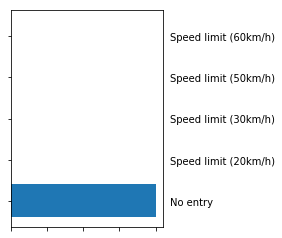

----------------------------------------------------------

Actual class:  General caution


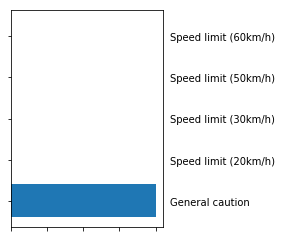

----------------------------------------------------------

Actual class:  Turn right ahead


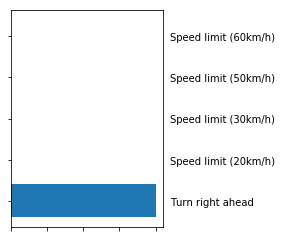

----------------------------------------------------------



In [49]:
new_label_sign_names = read_csv("new_signnames.csv").values[:, 1]


# Credit https://github.com/navoshta/traffic-signs/blob/master/Traffic_Signs_Recognition.ipynb
def plot_image_statistics(predictions, index):
    plt.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=2)
    plt.barh(np.arange(5)+.5, predictions[0][index], align='center')
    plt.yticks(np.arange(5)+.5, signnames[predictions[1][index].astype(int)])
    plt.tick_params(axis='both', which='both', labelleft='off', labelright='on', labeltop='off', labelbottom='off')
    plt.show()
    
    
for i in range(5):
    print("Actual class: ", new_label_sign_names[i])
    plot_image_statistics(top5, i)
    print("----------------------------------------------------------\n")

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [50]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")